In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import re
import matplotlib.pyplot as plt
%pylab inline

#some additional libraries
!pip install altair
import altair as alt

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['math', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [37]:
df_math = pd.read_csv('Student Performance and Alcohol Dataset/student-mat.csv')
df_portuguese = pd.read_csv('Student Performance and Alcohol Dataset/student-por.csv')

In [38]:
df_math.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [39]:
df_portuguese.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [40]:
df_math.insert(0,'class','math')
df_portuguese.insert(0,'class','portuguese')

print(df_math)
print(df_portuguese)

    class school sex  age address famsize Pstatus  Medu  Fedu      Mjob  ...  \
0    math     GP   F   18       U     GT3       A     4     4   at_home  ...   
1    math     GP   F   17       U     GT3       T     1     1   at_home  ...   
2    math     GP   F   15       U     LE3       T     1     1   at_home  ...   
3    math     GP   F   15       U     GT3       T     4     2    health  ...   
4    math     GP   F   16       U     GT3       T     3     3     other  ...   
..    ...    ...  ..  ...     ...     ...     ...   ...   ...       ...  ...   
390  math     MS   M   20       U     LE3       A     2     2  services  ...   
391  math     MS   M   17       U     LE3       T     3     1  services  ...   
392  math     MS   M   21       R     GT3       T     1     1     other  ...   
393  math     MS   M   18       R     LE3       T     3     2  services  ...   
394  math     MS   M   19       U     LE3       T     1     1     other  ...   

    famrel freetime goout  Dalc  Walc  

In [41]:
frames = [df_math,df_portuguese]
student_merged = pd.concat(frames)

print(student_merged.columns)
student_merged.head(10)

Index(['class', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,class,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,math,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,math,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,math,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,math,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,math,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
5,math,GP,M,16,U,LE3,T,4,3,services,...,5,4,2,1,2,5,10,15,15,15
6,math,GP,M,16,U,LE3,T,2,2,other,...,4,4,4,1,1,3,0,12,12,11
7,math,GP,F,17,U,GT3,A,4,4,other,...,4,1,4,1,1,1,6,6,5,6
8,math,GP,M,15,U,LE3,A,3,2,services,...,4,2,2,1,1,1,0,16,18,19
9,math,GP,M,15,U,GT3,T,3,4,other,...,5,5,1,1,1,5,0,14,15,15


In [42]:
mathMask = student_merged['class'] == 'math'
porgMask = student_merged['class'] == 'portuguese'

In [43]:
print("There are " + str(len(student_merged[porgMask])) +" students enrolled in the portuguese course.")
print("There are " + str(len(student_merged[mathMask])) +" students enrolled in the mathematics course.")

There are 649 students enrolled in the portuguese course.
There are 395 students enrolled in the mathematics course.


# Data Visualization and Insights

In [44]:
hist_1 = student_merged[mathMask]['G3']
hist_2 = student_merged[porgMask]['G3']

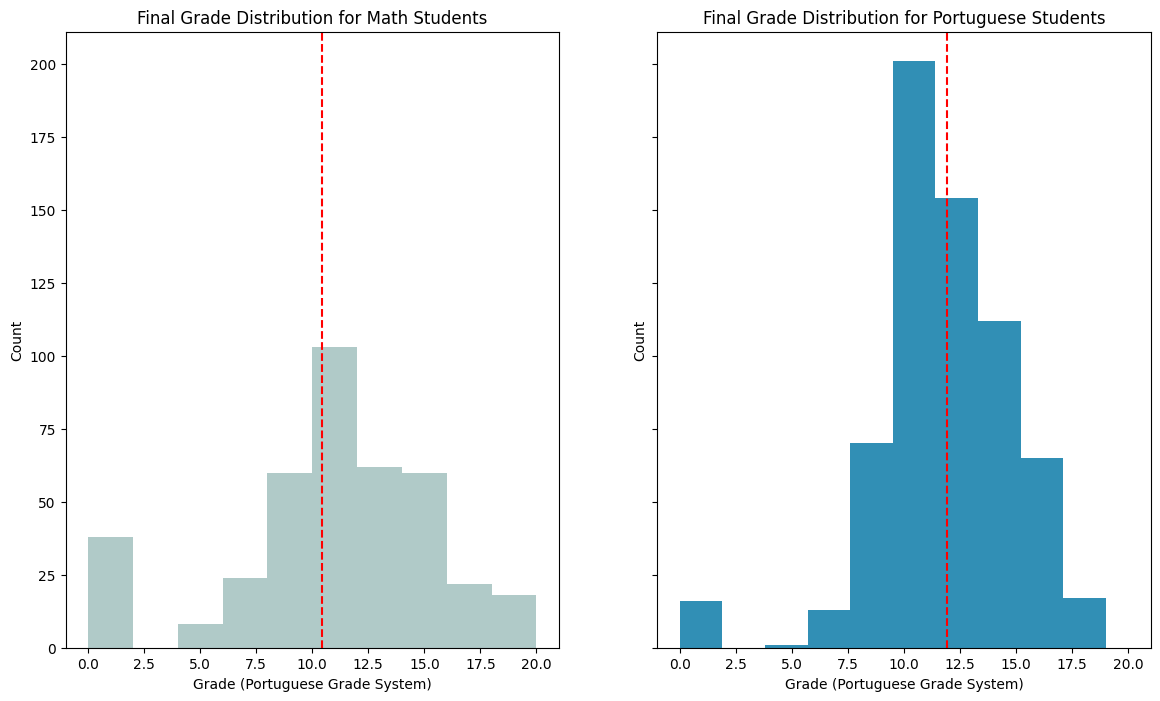

In [45]:
# First, create a blank figure and "axis" objects
fig, (ax1, ax2) = subplots(nrows=1,
                                ncols=2,
                                sharex=True,
                                sharey=True,
                                figsize=(14, 8))

# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax1.hist(hist_1.values,color = '#b0cac8')
ax1.set_title('Final Grade Distribution for Math Students')
ax1.set_ylabel('Count')
ax1.set_xlabel('Grade (Portuguese Grade System)')
ax1.axvline(hist_1.mean(), color='r',linestyle='dashed')

ax2.hist(hist_2.values,color = '#318fb5')
ax2.set_title('Final Grade Distribution for Portuguese Students')
ax2.set_ylabel('Count')
ax2.set_xlabel('Grade (Portuguese Grade System)')
ax2.axvline(hist_2.mean(), color='r',linestyle='dashed')

show()

<font size="4"> Notice here that the average grade for students taking the Portuguese class is, on average, higher than the average grade of students taking the math class. Perhaps the course content itself is more difficult in the mathematics class.

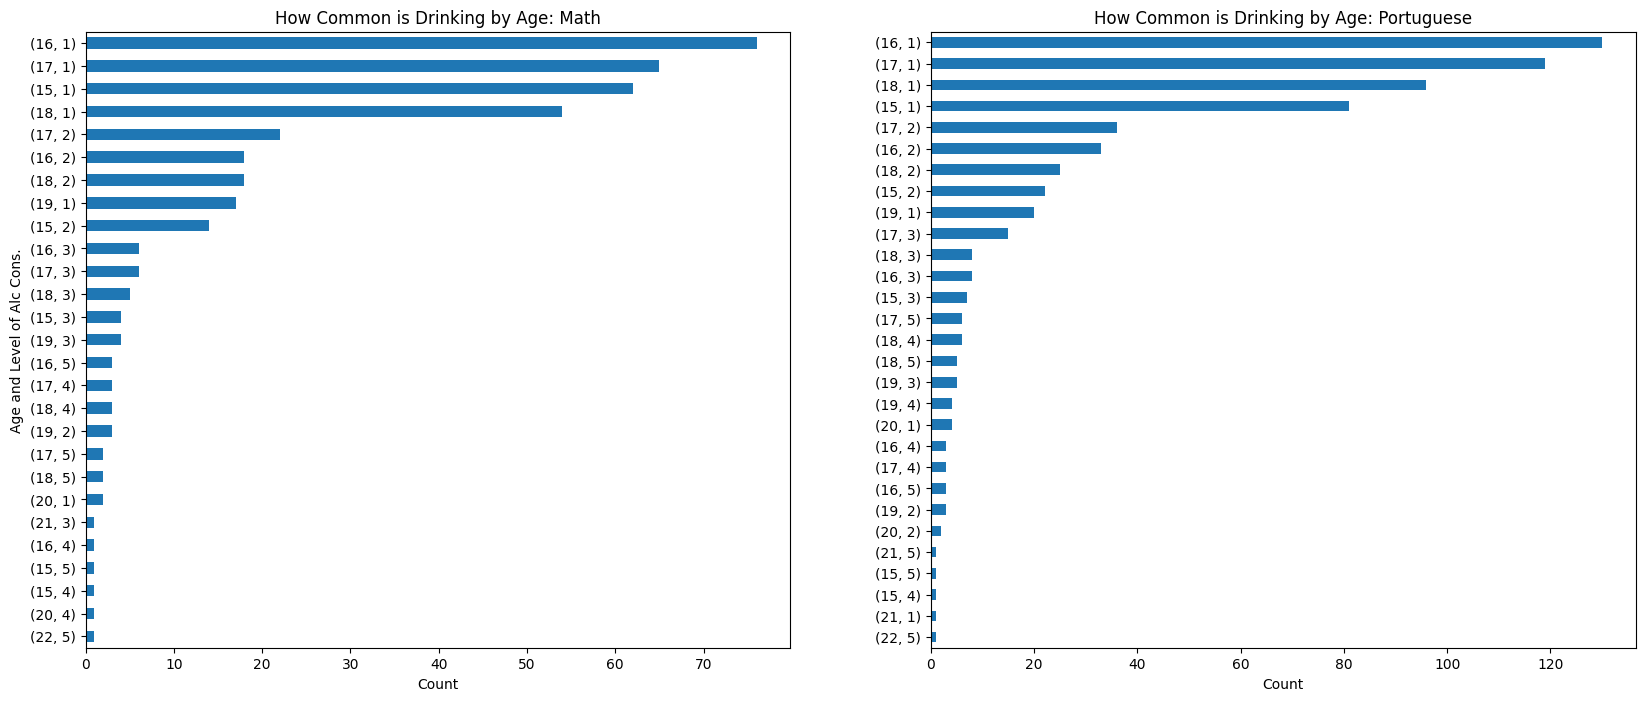

In [46]:
age_alcohol_math = student_merged[mathMask].groupby(['age'])['Dalc'].value_counts().sort_values(ascending=True)
# age_alcohol.plot(kind='barh',color=['#318fb5'],width=.8)

age_alcohol_porg = student_merged[porgMask].groupby(['age'])['Dalc'].value_counts().sort_values(ascending=True)
fig, axes = plt.subplots(nrows=1, ncols=2)

ylabel('Count')
figsize(20, 8)
#add DataFrames to subplots
age_alcohol_math.plot(kind='barh',ax=axes[0])
age_alcohol_porg.plot(kind='barh',ax=axes[1])

axes[0].set_xlabel('Count')
axes[1].set_xlabel('Count')
axes[0].set_ylabel('Age and Level of Alc Cons.')
axes[1].set_ylabel('')

axes[0].set_title('How Common is Drinking by Age: Math')
axes[1].set_title('How Common is Drinking by Age: Portuguese')

show()

<font size="4"> There are more young students that rate themselves as drinking the least amount of alcohol than mostly older students who drink moderate to high amounts of alcohol on a daily basis. Within the context of a secondary-education environment, the general trend for minors drinking alcohol is relatively low based on the sample in this study. It should also be noted that the legal drinking age in Portugal is 18, but there are exceptions.

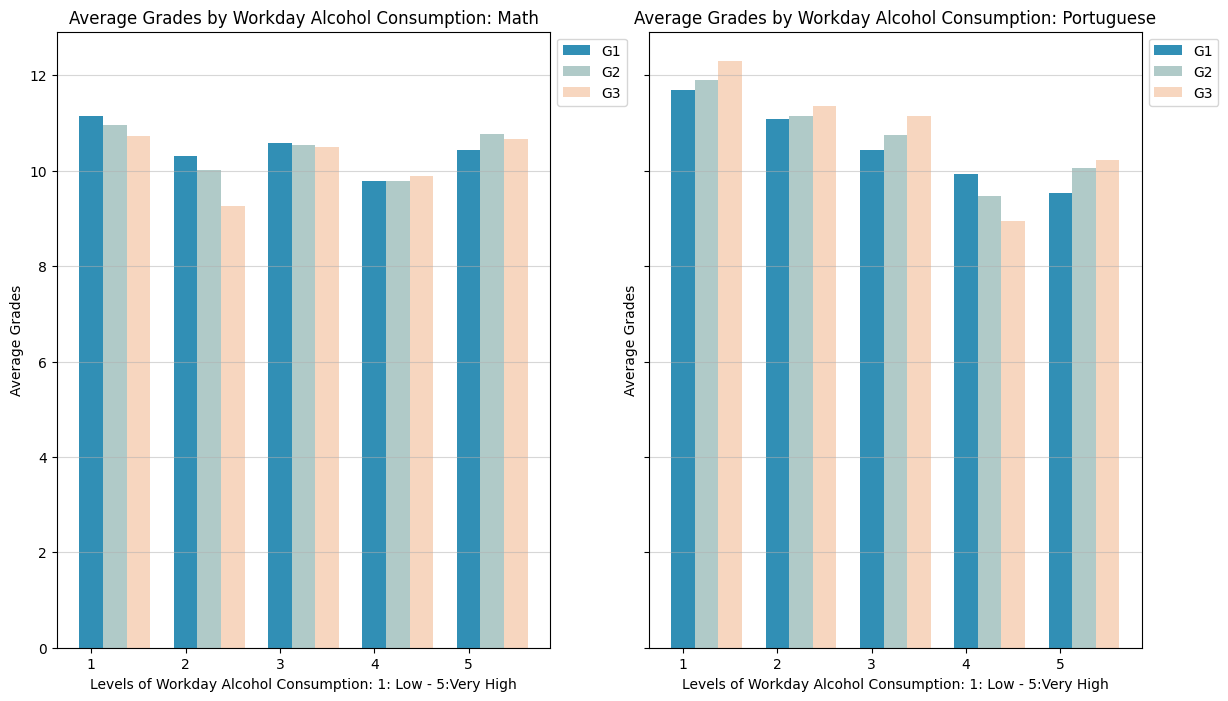

In [47]:
# First, create a blank figure and "axis" objects
fig, (ax1, ax2) = subplots(nrows=1,
                                ncols=2,
                                sharex=True,
                                sharey=True,
                                figsize=(14, 8))
# Customize the colors here
colors = ['#318fb5', '#b0cac8', '#f7d6bf']

# math class
mathG1 = student_merged[mathMask].groupby('Dalc')['G1'].agg('mean')
mathG2 = student_merged[mathMask].groupby('Dalc')['G2'].agg('mean')
mathG3 = student_merged[mathMask].groupby('Dalc')['G3'].agg('mean')

x1,y1,x2,y2,x3,y3 = mathG1.index,mathG1.values,mathG2.index,mathG2.values,mathG3.index,mathG3.values

width = 0.25

# Add gridlines
ax1.grid(axis='y', linestyle='-', alpha=0.5)
ax1.bar(x1, y1, width=width, color=colors[0], label='G1')
ax1.bar(x2 + width, y2, width=width, color=colors[1], label='G2')
ax1.bar(x3 + 2 * width, y3, width=width, color=colors[2], label='G3')

# Customize plot, add legend
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_title("Average Grades by Workday Alcohol Consumption: Math")
ax1.set_xlabel("Levels of Workday Alcohol Consumption: 1: Low - 5:Very High")
ax1.set_ylabel("Average Grades")

# Portuguese class
porgG1 = student_merged[porgMask].groupby('Dalc')['G1'].agg('mean')
porgG2 = student_merged[porgMask].groupby('Dalc')['G2'].agg('mean')
porgG3 = student_merged[porgMask].groupby('Dalc')['G3'].agg('mean')

# Assuming you have already calculated mathG1, mathG2, and mathG3
x_1, y_1, x_2, y_2, x_3, y_3 = porgG1.index,porgG1.values,porgG2.index,porgG2.values,porgG3.index,porgG3.values

# Add gridlines
ax2.grid(axis='y', linestyle='-', alpha=0.5)
ax2.bar(x_1, y_1, width=width, color=colors[0], label='G1')
ax2.bar(x_2 + width, y_2, width=width, color=colors[1], label='G2')
ax2.bar(x_3 + 2 * width, y_3, width=width, color=colors[2], label='G3')

# Customize plot, add legend
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_title("Average Grades by Workday Alcohol Consumption: Portuguese")
ax2.set_xlabel("Levels of Workday Alcohol Consumption: 1: Low - 5:Very High")
ax2.set_ylabel("Average Grades")

plt.show()

<font size="4"> We can say with confidence that grades seem to be higher when the amount of daily alcohol consumption is low to moderate. The average grades achieved by students rating themselves as 1, 2, or 3 in daily alcohol consumption is supported by the enrollment size of the Portuguese class (600+). On average, in the range of 1-3 for 'Dalc,' average grades in math courses are lower than those of Portuguese enrollees. This might be indicative that alcohol plays a bigger role in affecting performance in quantitative courses.

In [48]:
math = student_merged[student_merged['class'] == 'math']
barG1 = alt.Chart(math).mark_bar().encode(
    x=alt.X('Pstatus:N'),
    y=alt.Y('mean(G1):Q', title = "Mean of G1: Math"),
    color= alt.Color('Pstatus:N', 
                  scale=alt.Scale(domain=['A', 'T'], 
                  range=["#318fb5", "#f7d6bf"]))
)
barG2 = alt.Chart(math).mark_bar().encode(
    x=alt.X('Pstatus:N'),
    y=alt.Y('mean(G2):Q', title = "Mean of G2: Math"),
    color= alt.Color('Pstatus:N', 
                  scale=alt.Scale(domain=['A', 'T'], 
                  range=["#318fb5", "#f7d6bf"]))
)
barG3 = alt.Chart(math).mark_bar().encode(
    x=alt.X('Pstatus:N'),
    y=alt.Y('mean(G3):Q', title = "Mean of G3: Math"),
    color= alt.Color('Pstatus:N', 
                  scale=alt.Scale(domain=['A', 'T'], 
                  range=["#318fb5", "#f7d6bf"]))
)

mathCharts = (barG1|barG2|barG3).resolve_scale(
    y = 'shared'
)


In [49]:
porg = student_merged[student_merged['class'] == 'portuguese']
barG1 = alt.Chart(porg).mark_bar().encode(
    x=alt.X('Pstatus:N'),
    y=alt.Y('mean(G1):Q', title = "Mean of G1: Portuguese"),
    color= alt.Color('Pstatus:N', 
                  scale=alt.Scale(domain=['A', 'T'], 
                  range=["#318fb5", "#f7d6bf"]))
)
barG2 = alt.Chart(porg).mark_bar().encode(
    x=alt.X('Pstatus:N'),
    y=alt.Y('mean(G2):Q', title = "Mean of G2: Portuguese"),
    color= alt.Color('Pstatus:N', 
                  scale=alt.Scale(domain=['A', 'T'], 
                  range=["#318fb5", "#f7d6bf"]))
)
barG3 = alt.Chart(porg).mark_bar().encode(
    x=alt.X('Pstatus:N'),
    y=alt.Y('mean(G3):Q', title = "Mean of G3: Portuguese"),
    color= alt.Color('Pstatus:N', 
                  scale=alt.Scale(domain=['A', 'T'], 
                  range=["#318fb5", "#f7d6bf"]))
)

portCharts= (barG1|barG2|barG3).resolve_scale(
    y = 'shared'
)

(mathCharts | portCharts).properties (
    title = "Average Grades by Parent's Cohabitation Status: Math vs Portuguese"
)

alt.HConcatChart(...)

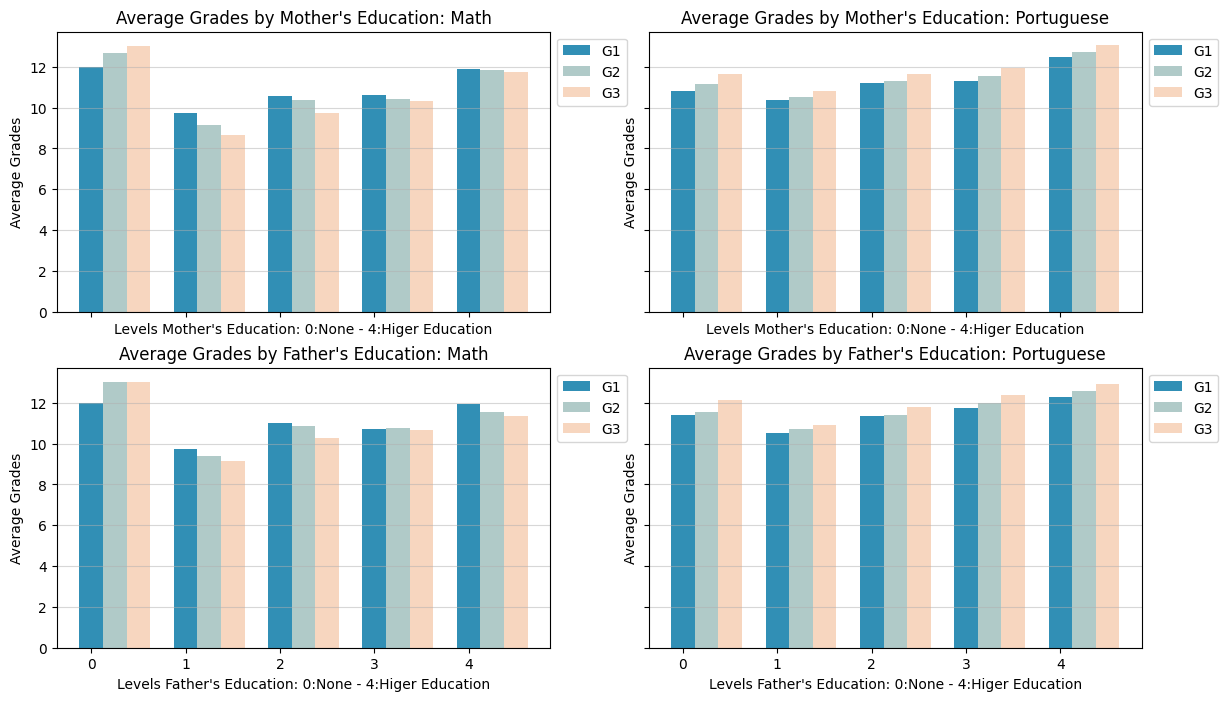

In [50]:
# First, create a blank figure and "axis" objects
fig, axs = subplots(nrows=2,
                    ncols=2,
                    sharex=True,
                    sharey=True,
                    figsize=(14, 8))
width = .25
ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]

# math class, mother
meduG1 = student_merged[mathMask].groupby('Medu')['G1'].agg('mean')
meduG2 = student_merged[mathMask].groupby('Medu')['G2'].agg('mean')
meduG3 = student_merged[mathMask].groupby('Medu')['G3'].agg('mean')

x1,y1,x2,y2,x3,y3 = meduG1.index,meduG1.values,meduG2.index,meduG2.values,meduG3.index,meduG3.values

ax1.grid(axis='y', linestyle='-', alpha=0.5)
ax1.bar(x1, y1, width=width, color=colors[0], label='G1')
ax1.bar(x2 + width, y2, width=width, color=colors[1], label='G2')
ax1.bar(x3 + 2 * width, y3, width=width, color=colors[2], label='G3')

# Customize plot, Add legend
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_title("Average Grades by Mother's Education: Math")
ax1.set_xlabel("Levels Mother's Education: 0:None - 4:Higer Education")
ax1.set_ylabel("Average Grades")

# Portuguese class, mother
meduG1 = student_merged[porgMask].groupby('Medu')['G1'].agg('mean')
meduG2 = student_merged[porgMask].groupby('Medu')['G2'].agg('mean')
meduG3 = student_merged[porgMask].groupby('Medu')['G3'].agg('mean')

x1,y1,x2,y2,x3,y3 = meduG1.index,meduG1.values,meduG2.index,meduG2.values,meduG3.index,meduG3.values

# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax2.grid(axis='y', linestyle='-', alpha=0.5)
ax2.bar(x1, y1, width=width, color=colors[0], label='G1')
ax2.bar(x2 + width, y2, width=width, color=colors[1], label='G2')
ax2.bar(x3 + 2 * width, y3, width=width, color=colors[2], label='G3')

# Customize plot, Add legend
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_title("Average Grades by Mother's Education: Portuguese")
ax2.set_xlabel("Levels Mother's Education: 0:None - 4:Higer Education")
ax2.set_ylabel("Average Grades")

# math class, father
feduG1 = student_merged[mathMask].groupby('Fedu')['G1'].agg('mean')
feduG2 = student_merged[mathMask].groupby('Fedu')['G2'].agg('mean')
feduG3 = student_merged[mathMask].groupby('Fedu')['G3'].agg('mean')

x1,y1,x2,y2,x3,y3 = feduG1.index,feduG1.values,feduG2.index,feduG2.values,feduG3.index,feduG3.values

# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax3.grid(axis='y', linestyle='-', alpha=0.5)
ax3.bar(x1, y1, width=width, color=colors[0], label='G1')
ax3.bar(x2 + width, y2, width=width, color=colors[1], label='G2')
ax3.bar(x3 + 2 * width, y3, width=width, color=colors[2], label='G3')

# Customize plot, Add legend
ax3.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax3.set_title("Average Grades by Father's Education: Math")
ax3.set_xlabel("Levels Father's Education: 0:None - 4:Higer Education")
ax3.set_ylabel("Average Grades")

# portuguese class, father
feduG1 = student_merged[porgMask].groupby('Fedu')['G1'].agg('mean')
feduG2 = student_merged[porgMask].groupby('Fedu')['G2'].agg('mean')
feduG3 = student_merged[porgMask].groupby('Fedu')['G3'].agg('mean')

x1,y1,x2,y2,x3,y3 = feduG1.index,feduG1.values,feduG2.index,feduG2.values,feduG3.index,feduG3.values

ax4.grid(axis='y', linestyle='-', alpha=0.5)
ax4.bar(x1, y1, width=width, color=colors[0], label='G1')
ax4.bar(x2 + width, y2, width=width, color=colors[1], label='G2')
ax4.bar(x3 + 2 * width, y3, width=width, color=colors[2], label='G3')

# Customize plot, Add legend
ax4.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax4.set_title("Average Grades by Father's Education: Portuguese")
ax4.set_xlabel("Levels Father's Education: 0:None - 4:Higer Education")
ax4.set_ylabel("Average Grades")

plt.show()

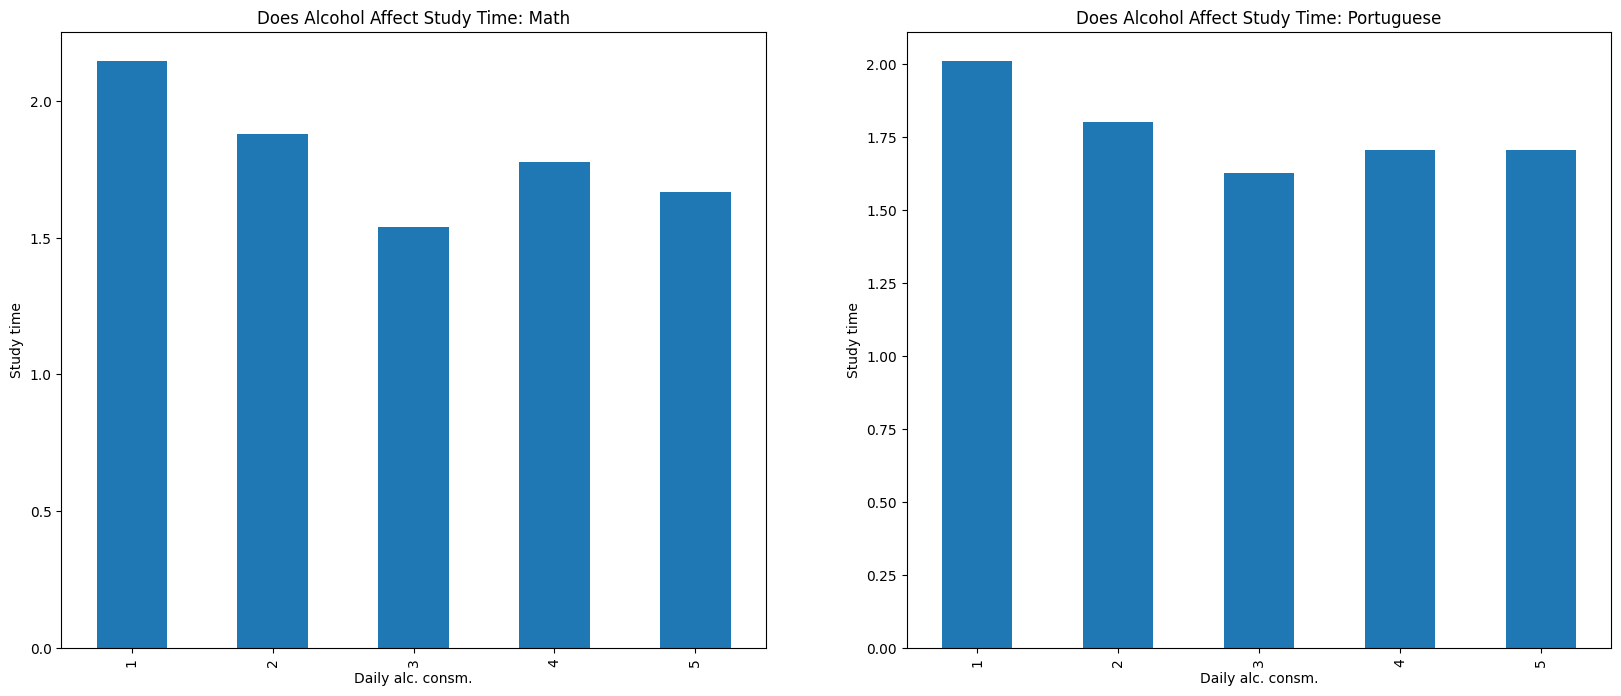

In [51]:
a = student_merged[mathMask].groupby(['Dalc'])['studytime'].agg(mean)
# age_alcohol.plot(kind='barh',color=['#318fb5'],width=.8)

b =  student_merged[porgMask].groupby(['Dalc'])['studytime'].agg(mean)
fig, axes = plt.subplots(nrows=1, ncols=2)

ylabel('Count')
figsize(20, 8)
#add DataFrames to subplots
a.plot(kind='bar',ax=axes[0])
b.plot(kind='bar',ax=axes[1])

axes[0].set_xlabel('Daily alc. consm.')
axes[1].set_xlabel('Daily alc. consm.')
axes[0].set_ylabel('Study time')
axes[1].set_ylabel('Study time')

axes[0].set_title('Does Alcohol Affect Study Time: Math')
axes[1].set_title('Does Alcohol Affect Study Time: Portuguese')

show()

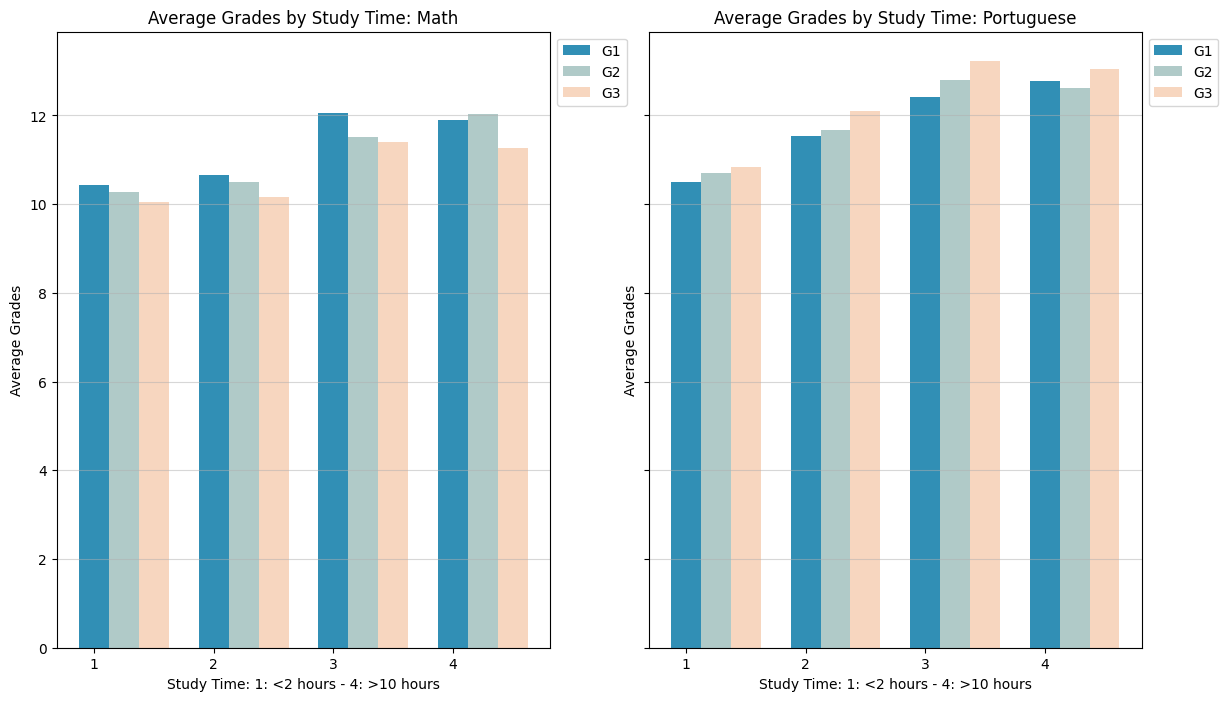

In [52]:
# First, create a blank figure and "axis" objects
fig, (ax1, ax2) = subplots(nrows=1,
                                ncols=2,
                                sharex=True,
                                sharey=True,
                                figsize=(14, 8))
width = .25

# Portuguese class, study time
studyG1 = student_merged[mathMask].groupby('studytime')['G1'].agg('mean')
studyG2 = student_merged[mathMask].groupby('studytime')['G2'].agg('mean')
studyG3 = student_merged[mathMask].groupby('studytime')['G3'].agg('mean')

x1,y1,x2,y2,x3,y3 = studyG1.index,studyG1.values,studyG2.index,studyG2.values,studyG3.index,studyG3.values

# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax1.grid(axis='y', linestyle='-', alpha=0.5)
ax1.bar(x1, y1, width=width, color=colors[0], label='G1')
ax1.bar(x2 + width, y2, width=width, color=colors[1], label='G2')
ax1.bar(x3 + 2 * width, y3, width=width, color=colors[2], label='G3')

# Customize plot, Add legend
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_title("Average Grades by Study Time: Math")
ax1.set_xlabel("Study Time: 1: <2 hours - 4: >10 hours")
ax1.set_ylabel("Average Grades")
ax1.set_xticks([1,2,3,4])


# portuguese class, father
studyG1 = student_merged[porgMask].groupby('studytime')['G1'].agg('mean')
studyG2 = student_merged[porgMask].groupby('studytime')['G2'].agg('mean')
studyG3 = student_merged[porgMask].groupby('studytime')['G3'].agg('mean')

x1,y1,x2,y2,x3,y3 = studyG1.index,studyG1.values,studyG2.index,studyG2.values,studyG3.index,studyG3.values

ax2.grid(axis='y', linestyle='-', alpha=0.5)
ax2.bar(x1, y1, width=width, color=colors[0], label='G1')
ax2.bar(x2 + width, y2, width=width, color=colors[1], label='G2')
ax2.bar(x3 + 2 * width, y3, width=width, color=colors[2], label='G3')


# Customize plot, Add legend
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_title("Average Grades by Study Time: Portuguese")
ax2.set_xlabel("Study Time: 1: <2 hours - 4: >10 hours")
ax2.set_ylabel("Average Grades")
ax1.set_xticks([1,2,3,4])

plt.show()

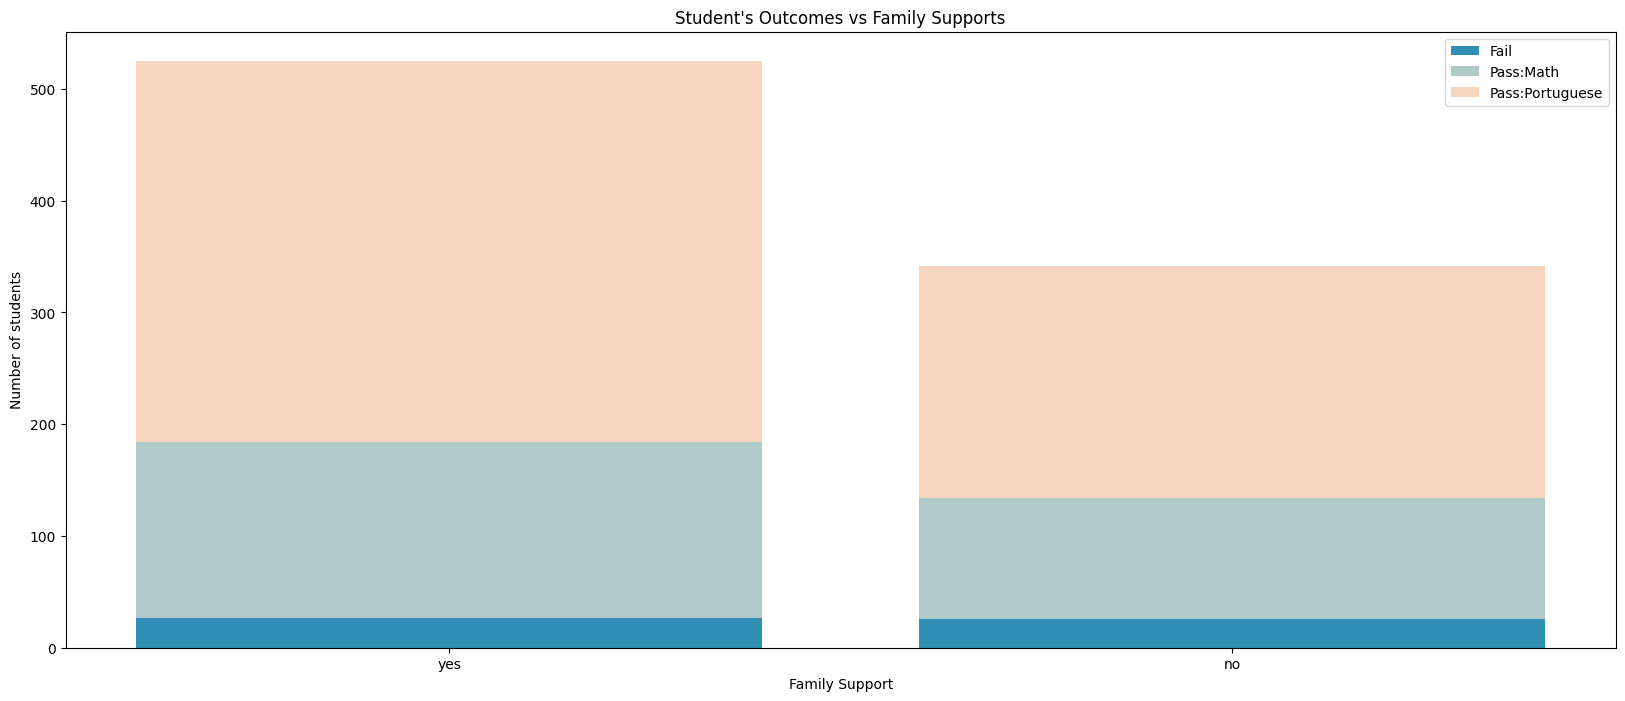

In [53]:
fail = student_merged[(student_merged['G3'] == 0)]['famsup'].value_counts()
pass_math = student_merged[(student_merged['class']=='math') & (student_merged['G3'] >= 10)]['famsup'].value_counts()
pass_porg = student_merged[(student_merged['class']=='portuguese') & (student_merged['G3'] >= 10)]['famsup'].value_counts()

labels =  ['yes', 'no']
fail_y = np.array(fail.values)
pMath_y = np.array(pass_math.values)
pPorg_y = np.array(pass_porg.values)

fig, ax = plt.subplots()
ax.bar(labels, fail_y, color = "#318fb5", label = 'Fail' )
ax.bar(labels, pMath_y, bottom = fail_y, color = "#b0cac8",label = "Pass:Math")
ax.bar(labels, pPorg_y, bottom = fail_y + pMath_y, color = "#f7d6bf",label = "Pass:Portuguese")
plt.xlabel("Family Support")
plt.ylabel("Number of students")
plt.title("Student's Outcomes vs Family Supports")
plt.legend()
plt.show()

<font size="4"> The plot above shows the count of students who passed or failed by whether or not they had received family support. We assume that students with 'G3' == 0 are students that either failed or dropped out of a course. Notice that the proportion of 'no' is almost equal to the proportion of 'yes' in the Fail population, which differs from the other two categories.

In [54]:
fail_N = student_merged[(student_merged['G3'] == 0)]['famsup'].value_counts(normalize = True)
pass_math_N = student_merged[(student_merged['class']=='math') & (student_merged['G3'] >= 10)]['famsup'].value_counts(normalize = True)
pass_porgN = student_merged[(student_merged['class']=='portuguese') & (student_merged['G3'] >= 10)]['famsup'].value_counts(normalize = True)

nl = '\n'
print(f'Fail {nl}{fail_N}')
print(f'Pass:Math {nl}{pass_math_N}')
print(f'Pass:Portuguese  {nl}{pass_porgN}' )

Fail 
yes    0.509434
no     0.490566
Name: famsup, dtype: float64
Pass:Math 
yes    0.592453
no     0.407547
Name: famsup, dtype: float64
Pass:Portuguese  
yes    0.621129
no     0.378871
Name: famsup, dtype: float64


<font size="4"> Were the *earlier grades* (G1 or G2 or both) of students who had failed or dropped by the third grade period (G3) indicative of what their semester outcome would be?

In [55]:
student_merged[(student_merged['G3'] == 0)][['class','G1','G2']].describe()

,G1,G2
count,53.000000,53.000000
mean,7.396226,4.415094
std,1.801064,3.707757
min,4.000000,0.000000
25%,6.000000,0.000000
50%,7.000000,5.000000
75%,8.000000,8.000000
max,12.000000,10.000000


<font size="4"> We can conclude, among other things, that family support is important to the success of one's educational undertaking based on the analysis.

# Regression

Before running regression, let's add/mutate a new 'target' variable to signify whether students passed or failed, based on the Portuguese-system grade scale. We will name the new variable, 'Final', and it will contain a binary value of 0 if the student had a final grade from 0 to 9, and a value of 1 if the student had a final grade from 10 to 20.

This makes it easier for our subsequent regression to create a better-fit model than without the newly added variable. We will also be using it for purposes of **classification**.

In [56]:
student_merged['Final'] = student_merged['G3'].apply(lambda x: 1 if x >= 10 else 0)
student_merged.head()

,class,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Final
0,math,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,0
1,math,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,0
2,math,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,1
3,math,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,1
4,math,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,1


In [57]:
y, X = dmatrices('G3 ~ failures + higher + studytime + Dalc + schoolsup + health + Final',data= student_merged[porgMask], return_type='dataframe')


model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     96.48
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           7.40e-96
Time:                        21:37:04   Log-Likelihood:                -1448.0
No. Observations:                 649   AIC:                             2912.
Df Residuals:                     641   BIC:                             2948.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.2547      0.481  

In [58]:
y, X = dmatrices('studytime ~ romantic + famrel + famsup + reason + higher + failures',data= student_merged[porgMask], return_type='dataframe')


model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())
print(result.pvalues)


                            OLS Regression Results                            
Dep. Variable:              studytime   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     7.900
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           3.63e-10
Time:                        21:37:04   Log-Likelihood:                -768.52
No. Observations:                 649   AIC:                             1555.
Df Residuals:                     640   BIC:                             1595.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.4678 

In [59]:
y, X = dmatrices('G3 ~ romantic',data= student_merged[mathMask], return_type='dataframe')


model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.753
Date:                Tue, 11 Apr 2023   Prob (F-statistic):            0.00971
Time:                        21:37:04   Log-Likelihood:                -1157.8
No. Observations:                 395   AIC:                             2320.
Df Residuals:                     393   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.8365      0.280     

*Interestingly*, we did find that the 'romantic' attribute was statistically significant as well when included in the regression model for 'G3'. It should be noted that the R-squared value is small, however.

# Selecting Features for Classification Model

In [60]:
def formula(input):
    list_regressors = ""
    for regressor in input[1:]:
        list_regressors += " + " + regressor
    return 'G3 ~ ' + input[0] + list_regressors #concatenate all strings

formula(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'])

'G3 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu + Mjob + Fjob + reason + guardian + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + G1 + G2 + G3'

In [61]:
def rsquared(input):
    y, X = dmatrices(formula(input),data= student_merged[porgMask], return_type='dataframe')
    model = sm.OLS(y, X)   #set up and fit model
    result = model.fit()    
    return result.rsquared #print r-squared value

rsquared(['age'])

0.011343398235054813

In [62]:
def best_next_regressor(current,all):
    highest_regressor = ''
    highest_rvalue = 0
    for x in all:  #run rsquared function across all regressors, one-by-one
        if rsquared([x] + current) > highest_rvalue:
            highest_rvalue = rsquared([x] + current)
            highest_regressor = x
        else:
            pass
    return highest_regressor, highest_rvalue

all_regressors = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']

best_next_regressor([],all_regressors)

('failures', 0.15469712033157257)

In [63]:
def best_regressors(k,all):
    current_regressors = []
    r_values = []
    for x in range(k): #run best_next_regressor function 
        reg_x, r_value = best_next_regressor(current_regressors,all)
        current_regressors.append(reg_x)
        r_values.append(r_value)
    return current_regressors, r_values

best_regressors(10,all_regressors)

(['failures',
  'school',
  'higher',
  'studytime',
  'schoolsup',
  'Dalc',
  'Fjob',
  'health',
  'Mjob',
  'sex'],
 [0.15469712033157257,
  0.21282897155824276,
  0.251525361624956,
  0.27091233376401136,
  0.28588738158199367,
  0.30102956684719817,
  0.30905575513065575,
  0.31731247045235067,
  0.32491533788001326,
  0.33032336924226813])

# K-Nearest Neighbors Classification on the Merged Dataset

In [64]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

In [65]:
Y, X = dmatrices('Final ~ failures + studytime', data=student_merged, return_type='dataframe')
Y
y = Y['Final'].values

# Split the data into training and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

### What is the best number of neighbors to use?

In [66]:
# Import cross_val_predict
from sklearn.model_selection import cross_val_predict

neighbor = [1, 3, 5, 10, 20, 50, 100, 150, 200]
result = []
# Iterate over the number of neighbors
for k in neighbor:
    # Define the classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,
                                       weights='uniform')

    # Fit the model on the training data, and testing data
    knn.fit(X_train, y_train)
    # Predict the labels of the training and testing data using cross validation
    prediction_on_training = cross_val_predict(knn, X_train, y_train, cv=10)
    predicted_classes = cross_val_predict(knn, X_test, y_test, cv=10)
    
    # Evaluate the model
    result.append((str(k), metrics.accuracy_score(y_test, predicted_classes)))
    print("Training accuracy of the KNN model for " + str(k) + " neighbor(s) is " + str(metrics.accuracy_score(y_train, prediction_on_training)))
    print("Testing accuracy of the KNN model for " + str(k) + " neighbor(s) is " +str(metrics.accuracy_score(y_test, predicted_classes))+ "\n")

# Sort the result by accuracy
result = sorted(result, key=lambda x: x[1], reverse=True)
print("The best model is the KNN model with " + str(result[0][0]) + " neighbor(s) with an test accuracy of " + str(result[0][1]))

Training accuracy of the KNN model for 1 neighbor(s) is 0.6835616438356165
Testing accuracy of the KNN model for 1 neighbor(s) is 0.7770700636942676

Training accuracy of the KNN model for 3 neighbor(s) is 0.7191780821917808
Testing accuracy of the KNN model for 3 neighbor(s) is 0.7929936305732485

Training accuracy of the KNN model for 5 neighbor(s) is 0.7931506849315069
Testing accuracy of the KNN model for 5 neighbor(s) is 0.7929936305732485

Training accuracy of the KNN model for 10 neighbor(s) is 0.7849315068493151
Testing accuracy of the KNN model for 10 neighbor(s) is 0.7898089171974523

Training accuracy of the KNN model for 20 neighbor(s) is 0.810958904109589
Testing accuracy of the KNN model for 20 neighbor(s) is 0.7770700636942676

Training accuracy of the KNN model for 50 neighbor(s) is 0.8136986301369863
Testing accuracy of the KNN model for 50 neighbor(s) is 0.7866242038216561

Training accuracy of the KNN model for 100 neighbor(s) is 0.8
Testing accuracy of the KNN model

In [67]:
# k = 3 is the best model
knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

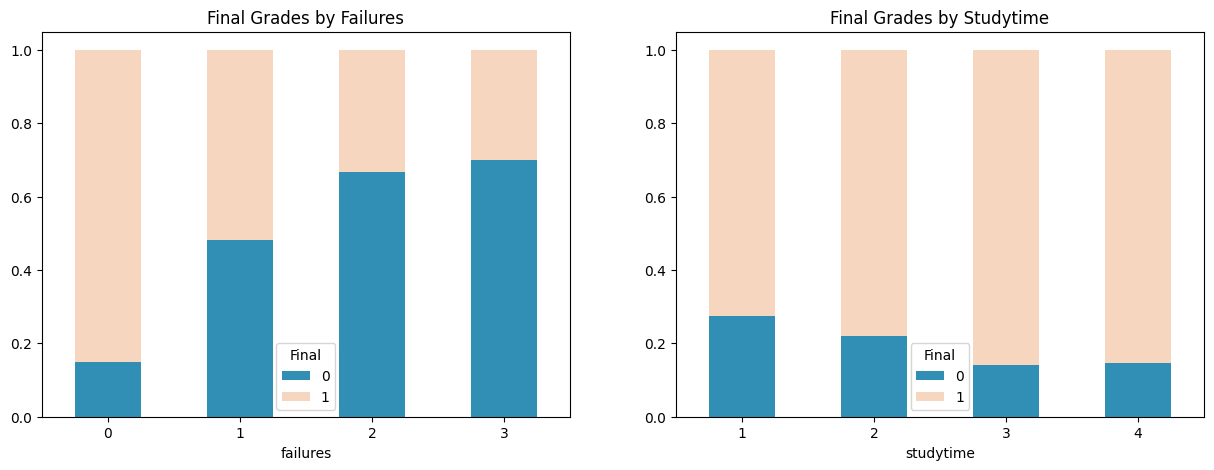

In [68]:
#Does the attributes we used for KNN make sense?
#Here we will plot the attributes to see if there are any patterns
colors = ['#318fb5', '#f7d6bf']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# Normalize the final grades based on the number of failures
student_merged.groupby(['failures', 'Final']).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', title = 'Final Grades by Failures', stacked=True, color=colors, ax=ax1)
# Normalize the final grades based on the study time
student_merged.groupby(['studytime', 'Final']).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', title = 'Final Grades by Studytime', stacked=True, color=colors, ax=ax2)
# Rotate the x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

In [69]:
future_student = pd.DataFrame({'Intercept': [1], 'failures': [0], 'studytime': [3]})
knn.predict(future_student)

array([1.])

From the knn prediction we can see, a future student with a relatively low number of failures (<= 1) and relatively low number of studytime (>= 3) is predicted to fail. 

In [70]:
future_student2 = pd.DataFrame({'Intercept': [1], 'failures': [3], 'studytime': [2]})
knn.predict(future_student2)

array([0.])

From the knn prediction we can see, a future student with a relatively low number of failures (<= 1) and relatively low number of studytime (>= 3) is predicted to fail. 